# 5. K-Means

1. 그룹 수에 해당하는 K 값 설정 (= Elbow Method)
2. K 값의 개수만큼 랜덤으로 중심점(centroid) 지정
3. 각 데이터를 그들로부터 더 가까운 중심점으로 clustering
4. 중심점을 각 임시 cluster 의 평균 지점으로 이동
5. 중심점이 이동된 경우 (3) 으로 돌아가 더이상 중심점의 이동이 없을 때까지 반복

#### K-Means++

(2)에서 중심점을 랜덤으로 설정하지 않고,  
전체 데이터 중에서 하나를 골라 중심점으로 설정하고, 그로부터 가장 먼 데이터를 두번째 중심점으로 설정한다.  
이 과정을 중심점이 K 개가 될 때까지 반복한다. 

In [39]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
# K-Means 실행 과정에서 memory leak 위험에 대한 warning 이 뜬다.
# StandardScaler 를 import 하기 전에 실행되어야 함

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
dataset = pd.read_csv("../../database/KMeansData.csv")
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [42]:
X = dataset.iloc[:, :].values
# X = dataset.values
# X = dataset.to_numpy()  # 공식 홈페이지 권장
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

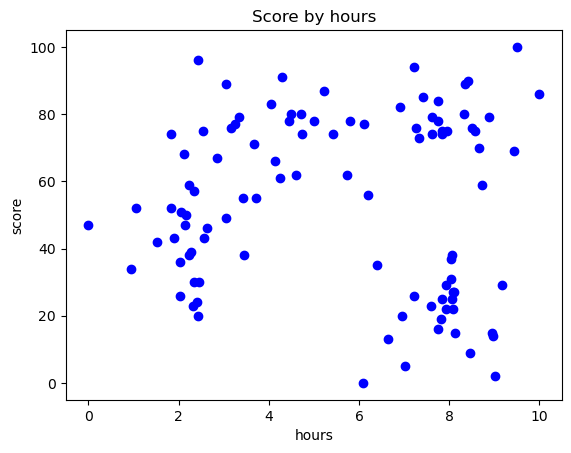

In [43]:
plt.scatter(X[:, 0], X[:, 1], c="b")  # hours, score
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (축 범위 통일)

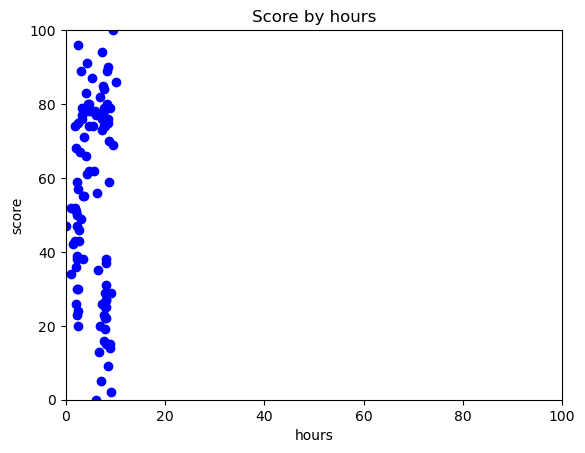

In [44]:
plt.scatter(X[:, 0], X[:, 1], c="b")  # hours, score
plt.title("Score by hours")
plt.xlabel("hours")
plt.xlim(0, 100)
plt.ylabel("score")
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

- hours, scores 와 같은 feature 들의 단위가 다르기 때문에 K-Means 를 적용할 때 각 feature 가 동일한 영향력을 가지도록 스케일링을 해줄 필요가 있음. 
- clustering 은 Euclidean Distance 를 사용하기 때문에 스케일링이 매우 중요함. 

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

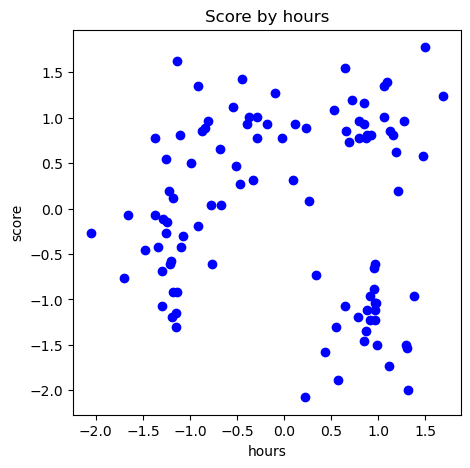

In [46]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c="b")  # hours, score
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 최적의 K 값 찾기 (엘보우 방식, Elbow Method)

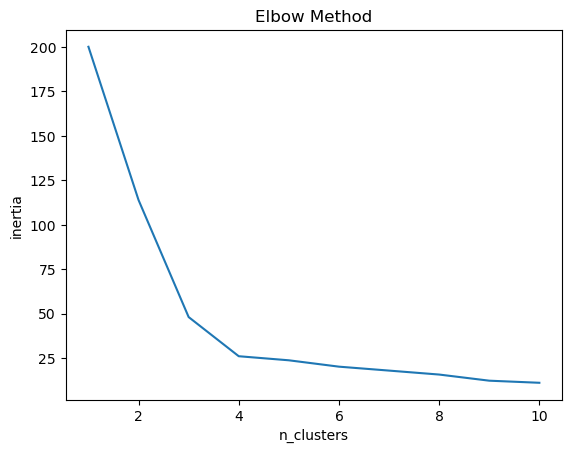

In [47]:
from sklearn.cluster import KMeans

inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)  # 각 지점으로부터 클러스터의 중심(centroid)까지 거리의 제곱의 합

plt.plot(range(1, 11), inertia_list)
plt.title("Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

### 최적의 K 값으로 K-Means 학습

In [48]:
K = 4  # 최적의 K 값

In [49]:
kmeans = KMeans(n_clusters=K, init="k-means++", n_init="auto", random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 0, 3, 3, 2, 2, 3, 1, 3, 3, 0, 2, 0, 0, 3, 2, 1, 0, 3, 2, 3,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 1, 0, 3, 3, 3, 0, 2, 1, 0,
       0, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 0, 1, 1, 3, 2, 0])

### 데이터 시각화 (최적의 K)

In [50]:
centers = kmeans.cluster_centers_  # 클러스터의 중심점 (centroid) 좌표
centers

array([[-1.24939347, -0.48807293],
       [ 0.94107583,  0.93569782],
       [ 0.8837666 , -1.26929779],
       [-0.57544896,  0.82167289]])

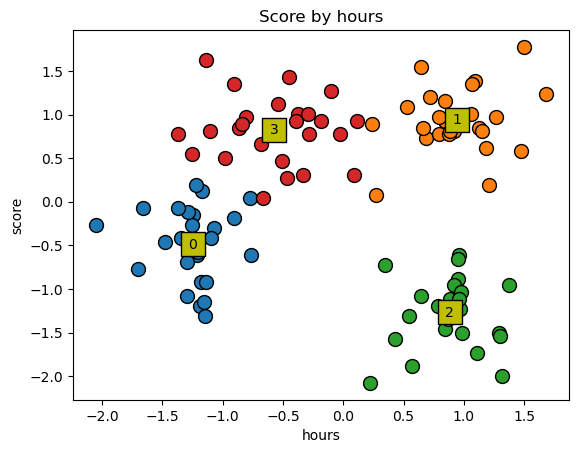

In [51]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors="black")
    plt.scatter(
        centers[cluster, 0], centers[cluster, 1], s=300, c="y", edgecolors="black", marker="s"
    )
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va="center", ha="center")

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (스케일링 원상복구)

In [52]:
X_org = sc.inverse_transform(X)  # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [53]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 2.1528, 41.24  ],
       [ 8.0084, 78.2   ],
       [ 7.8552, 20.96  ],
       [ 3.9544, 75.24  ]])

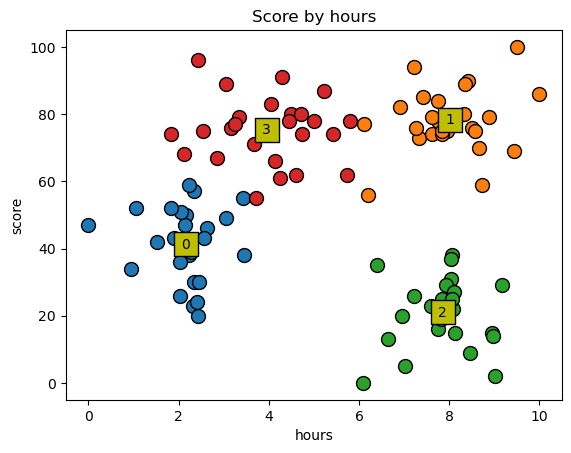

In [54]:
for cluster in range(K):
    plt.scatter(
        X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolors="black"
    )
    plt.scatter(
        centers_org[cluster, 0],
        centers_org[cluster, 1],
        s=300,
        c="y",
        edgecolors="black",
        marker="s",
    )
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va="center", ha="center")

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()